Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select the appropriate data set for your experiment and draw graphs.

Error:0.28539416725563693--a:1.69309840122,b:0.0372197540025
Error:0.0003539123709798305--a:0.19016525228567985,b:0.6492244571239089
Error:0.00035390624090251074--a:0.18948572727625587,b:0.64996631660447
Error:0.00035390624089962536--a:0.18948526109794123,b:0.649966825546448
Error:0.00035390624089962487--a:0.1894852607781263,b:0.6499668258956003
Error:0.00035390624089962487--a:0.18948526077791078,b:0.6499668258958355
Error:0.00035390624089962487--a:0.18948526077791078,b:0.6499668258958355
Error:0.00035390624089962487--a:0.18948526077791078,b:0.6499668258958355
Error:0.00035390624089962487--a:0.18948526077791078,b:0.6499668258958355
Error:0.00035390624089962487--a:0.18948526077791078,b:0.6499668258958355
2.4755610602936344
0.013794923017770381


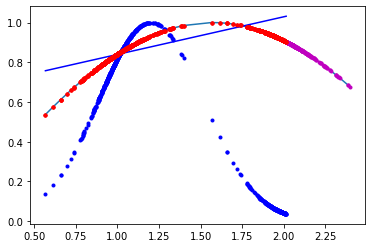

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import math
boston=load_boston()
features=pd.DataFrame(boston.data,columns=boston.feature_names)
target=pd.DataFrame(boston.target,columns=['target'])
data=pd.concat([features,target],axis=1)
x=data['RM']
X1=sorted(np.array(x/x.mean()))

X=X1+[i+1 for i in X1]

Y=np.sin(X)
plt.plot(X,Y)
n=int(0.8*len(X))
x_train=X[:n]
y_train=Y[:n]
x_test=X[n:]
y_test=Y[n:]
w=np.exp([-(1.2-i)**2/(2*0.1) for i in x_train])

plt.plot(x_train,y_train,'r.')
plt.plot(x_train,w,'b.')
def h(x,a,b):
    return a*x+b

def error(a,x,b,y,w):
    e=0
    m=len(x)
    for i in range(m):
        e +=np.power(h(x[i],a,b)-y[i],2)*w[i]
    return(1/(2*m))*e

def step_gradient(a,x,b,y,learning_rate,w):
    grad_a=0
    grad_b=0
    m=len(x)
    for i in range(m):
        grad_a +=(2/m)*((h(x[i],a,b)-y[i])*x[i])*w[i]
        grad_b +=(2/m)*(h(x[i],a,b)-y[i])*w[i]
    a=a-(grad_a * learning_rate)
    b=b-(grad_b * learning_rate)
   
    return a,b

def descend(initial_a,initial_b,x,y,learning_rate,iteration,w):
    a=initial_a
    b=initial_b
    for i in range(iterations):
        e=error(a,x,b,y,w)
        if i%1000==0:
            print(f"Error:{e}--a:{a},b:{b}")
           
        a,b=step_gradient(a,x,b,y,learning_rate,w)
    return a,b

a=1.69309840122
b=0.0372197540025
learning_rate=0.3
iterations=10000

final_a,final_b=descend(a,b,x_train,y_train,learning_rate,iterations,w)
H=[i*final_a+final_b for i in x_train]
plt.plot(x_train,y_train,'r.',x_train,H,'b')
print(error(a,x_test,b,y_test,w))
print(error(final_a,x_test,final_b,y_test,w))
plt.plot(x_test,y_test,'m.',x_train,y_train,'r.')